In [57]:
import pandas as pd
import numpy as np
import requests
import re
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [58]:
base_url = "https://ncaa-api.henrygd.me"
pages = ["/stats/volleyball-women/d1/current/team/45"] + [f"/stats/volleyball-women/d1/current/team/45/p{i}" for i in range(2, 8)]

dfs = []
for page in pages:
    url = base_url + page
    response = requests.get(url)
    df = pd.DataFrame(response.json())
    df = pd.concat([df.drop(["sport", "title", "updated", "page", "pages", "data"], axis=1), df["data"].apply(pd.Series)], axis=1)
    dfs.append(df)

hitting_pct_df = pd.concat(dfs)
hitting_pct_df

,Rank,Team,S,Kills,Errors,Total Attacks,Pct.
0,1,Pittsburgh,78,1086,287,2377,.336
1,2,Creighton,83,1195,322,2745,.318
2,3,Stanford,80,1127,328,2589,.309
3,4,Florida,83,1130,360,2506,.307
4,5,Wisconsin,81,1122,312,2676,.303
...,...,...,...,...,...,...,...
29,330,Ark.-Pine Bluff,98,969,564,3198,.127
30,331,Mississippi Val.,70,679,404,2192,.125
31,332,Campbell,99,1018,613,3290,.123
32,333,Austin Peay,97,1041,629,3416,.121


<Axes: xlabel='Pct.', ylabel='Density'>

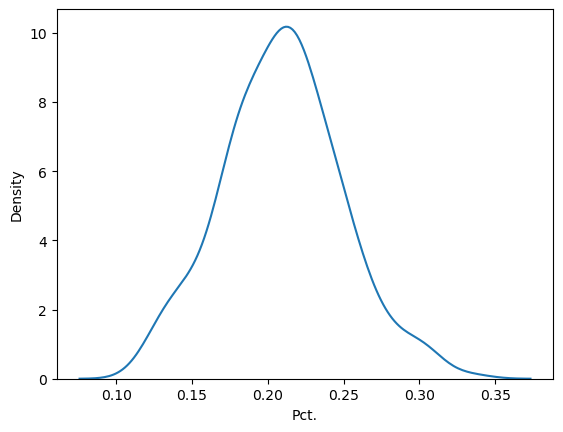

In [59]:
hitting_pct_df["Pct."] = hitting_pct_df["Pct."].astype(float)
sns.kdeplot(data=hitting_pct_df, x="Pct.")

In [60]:
base_url = "https://ncaa-api.henrygd.me"
pages = ["/stats/volleyball-women/d1/current/team/911"] + [f"/stats/volleyball-women/d1/current/team/911/p{i}" for i in range(2, 8)]

dfs = []
for page in pages:
    url = base_url + page
    response = requests.get(url)
    df = pd.DataFrame(response.json())
    df = pd.concat([df.drop(["sport", "title", "updated", "page", "pages", "data"], axis=1), df["data"].apply(pd.Series)], axis=1)
    dfs.append(df)

opp_hitting_pct_df = pd.concat(dfs)
opp_hitting_pct_df

,Rank,Team,S,Opp Kills,Opp Errors,Opp Attacks,Opp Pct
0,1,Pittsburgh,78,764,500,2421,.109
1,2,Bucknell,79,870,506,3047,.119
2,3,Creighton,83,856,496,2824,.127
3,4,Dayton,89,930,537,3006,.131
4,5,Louisville,83,878,493,2777,.139
...,...,...,...,...,...,...,...
29,330,Cal St. Fullerton,85,1144,387,2845,.266
30,331,Evansville,107,1479,493,3668,.269
31,332,Gonzaga,83,1151,383,2853,.269
32,333,Manhattan,96,1245,432,3008,.270


<Axes: xlabel='Opp Pct', ylabel='Density'>

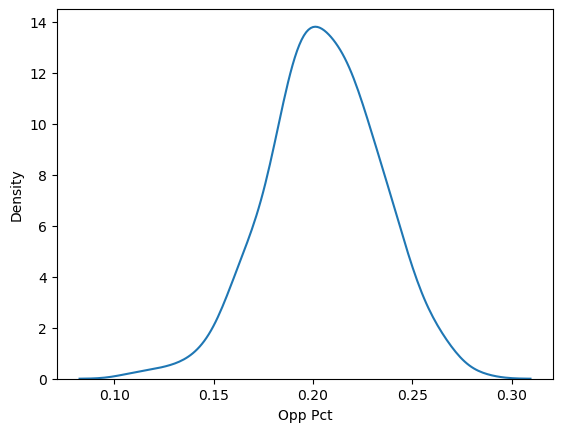

In [61]:
opp_hitting_pct_df["Opp Pct"] = opp_hitting_pct_df["Opp Pct"].astype(float)
sns.kdeplot(data=opp_hitting_pct_df, x="Opp Pct")

In [62]:
ovr_hitting_pct_df = pd.merge(hitting_pct_df, opp_hitting_pct_df, on="Team")
ovr_hitting_pct_df["+/- Pct"] = ovr_hitting_pct_df["Pct."] - ovr_hitting_pct_df["Opp Pct"]
scaler = StandardScaler()
ovr_hitting_pct_df["+/- Pct Z-Score"] = scaler.fit_transform(ovr_hitting_pct_df[["+/- Pct"]])
ovr_hitting_pct_df = ovr_hitting_pct_df.sort_values(by="+/- Pct Z-Score", ascending=False)
ovr_hitting_pct_df

,Rank_x,Team,S_x,Kills,Errors,Total Attacks,Pct.,Rank_y,S_y,Opp Kills,Opp Errors,Opp Attacks,Opp Pct,+/- Pct,+/- Pct Z-Score
0,1,Pittsburgh,78,1086,287,2377,0.336,1,78,764,500,2421,0.109,0.227,3.788296
1,2,Creighton,83,1195,322,2745,0.318,3,83,856,496,2824,0.127,0.191,3.175866
6,7,Dayton,89,1259,374,2932,0.302,4,89,930,537,3006,0.131,0.171,2.835628
4,5,Wisconsin,81,1122,312,2676,0.303,33,81,948,468,2850,0.168,0.135,2.223198
10,11,Nebraska,83,1185,362,2791,0.295,22,83,957,480,2945,0.162,0.133,2.189175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,315,Gonzaga,83,855,427,2935,0.146,332,83,1151,383,2853,0.269,-0.123,-2.165879
317,318,Marist,94,992,575,2968,0.140,329,94,1173,409,2897,0.264,-0.124,-2.182891
332,334,Holy Cross,83,853,527,2881,0.113,299,83,1060,379,2837,0.240,-0.127,-2.233927
323,325,Central Conn. St.,83,770,436,2552,0.131,328,83,1040,369,2563,0.262,-0.131,-2.301974


In [63]:
base_url = "https://ncaa-api.henrygd.me"
pages = ["/stats/football/fbs/current/team/27"] + [f"/stats/football/fbs/current/team/27/p{i}" for i in range(2, 4)]

dfs = []
for page in pages:
    url = base_url + page
    response = requests.get(url)
    df = pd.DataFrame(response.json())
    df = pd.concat([df.drop(["sport", "title", "updated", "page", "pages", "data"], axis=1), df["data"].apply(pd.Series)], axis=1)
    dfs.append(df)

off_scoring_df = pd.concat(dfs)
off_scoring_df

,Rank,Team,G,TDs,PAT,2PT,Def Pts,FG,Saf,Pts,PPG
0,1,Miami (FL),10,58,52,4,0,14,0,450.00,45.0
1,2,Indiana,10,59,59,0,0,8,1,439.00,43.9
2,3,Boise St.,9,52,48,2,0,10,0,394.00,43.8
3,4,Tulane,10,54,48,1,0,12,0,410.00,41.0
4,5,Ole Miss,10,50,47,0,0,20,0,407.00,40.7
...,...,...,...,...,...,...,...,...,...,...,...
28,129,Air Force,9,18,14,0,0,8,0,146.00,16.2
29,-,Southern Miss.,9,17,15,1,0,7,0,146.00,16.2
30,131,Houston,9,17,14,0,0,7,0,137.00,15.2
31,132,Kent St.,9,18,16,0,0,4,0,136.00,15.1


<Axes: xlabel='PPG', ylabel='Density'>

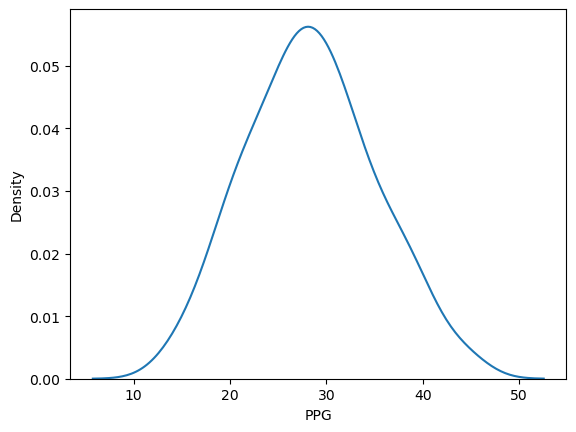

In [64]:
off_scoring_df["PPG"] = off_scoring_df["PPG"].astype(float)
sns.kdeplot(data=off_scoring_df, x="PPG")

In [65]:
base_url = "https://ncaa-api.henrygd.me"
pages = ["/stats/football/fbs/current/team/28"] + [f"/stats/football/fbs/current/team/28/p{i}" for i in range(2, 4)]

dfs = []
for page in pages:
    url = base_url + page
    response = requests.get(url)
    df = pd.DataFrame(response.json())
    df = pd.concat([df.drop(["sport", "title", "updated", "page", "pages", "data"], axis=1), df["data"].apply(pd.Series)], axis=1)
    dfs.append(df)

def_scoring_df = pd.concat(dfs)
def_scoring_df

,Rank,Team,G,TDs,Opp XP,2PT,Opp DXP,Opp FGM,Opp Saf,Pts,Avg
0,1,Army West Point,9,12,8,2,0,3,0,93.00,10.33
1,2,Ohio St.,9,10,7,1,0,9,0,96.00,10.67
2,3,Notre Dame,9,11,10,0,0,8,0,100.00,11.11
3,4,Texas,9,11,10,0,0,11,0,109.00,12.11
4,5,Tennessee,9,13,9,1,0,8,0,113.00,12.56
...,...,...,...,...,...,...,...,...,...,...,...
28,-,Tulsa,9,46,44,1,0,6,0,340.00,37.78
29,130,New Mexico,10,49,45,1,0,14,0,383.00,38.30
30,131,Ball St.,10,53,44,3,0,11,0,401.00,40.10
31,132,Utah St.,9,48,42,3,0,15,0,381.00,42.33


<Axes: xlabel='Avg', ylabel='Density'>

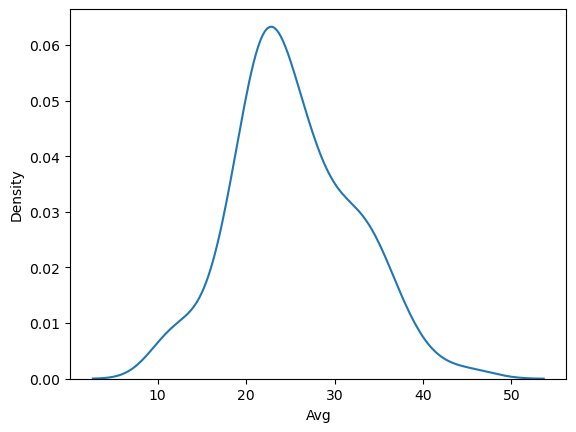

In [66]:
def_scoring_df["Avg"] = def_scoring_df["Avg"].astype(float)
sns.kdeplot(data=def_scoring_df, x="Avg")

In [67]:
ovr_scoring_df = pd.merge(off_scoring_df, def_scoring_df, on="Team")
ovr_scoring_df["+/- PPG"] = ovr_scoring_df["PPG"] - ovr_scoring_df["Avg"]
scaler = StandardScaler()
ovr_scoring_df["+/- PPG Z-Score"] = scaler.fit_transform(ovr_scoring_df[["+/- PPG"]])
ovr_scoring_df = ovr_scoring_df.sort_values(by="+/- PPG Z-Score", ascending=False)
ovr_scoring_df

,Rank_x,Team,G_x,TDs_x,PAT,2PT_x,Def Pts,FG,Saf,Pts_x,...,TDs_y,Opp XP,2PT_y,Opp DXP,Opp FGM,Opp Saf,Pts_y,Avg,+/- PPG,+/- PPG Z-Score
1,2,Indiana,10,59,59,0,0,8,1,439.00,...,16,15,0,0,9,0,138.00,13.80,30.10,2.393007
10,11,Ohio St.,9,47,47,0,0,6,0,347.00,...,10,7,1,0,9,0,96.00,10.67,27.93,2.201208
4,5,Ole Miss,10,50,47,0,0,20,0,407.00,...,13,12,0,0,13,0,129.00,12.90,27.80,2.189717
11,12,Notre Dame,9,46,45,0,0,8,0,345.00,...,11,10,0,0,8,0,100.00,11.11,27.19,2.135801
9,10,Texas,9,47,46,1,0,6,1,350.00,...,11,10,0,0,11,0,109.00,12.11,26.79,2.100447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,125,Akron,9,20,17,3,0,9,0,170.00,...,42,39,2,0,9,1,324.00,36.00,-17.10,-1.778858
121,-,Temple,9,21,16,2,0,9,0,173.00,...,44,39,3,0,8,1,335.00,37.22,-18.02,-1.860174
129,-,Southern Miss.,9,17,15,1,0,7,0,146.00,...,38,36,0,1,14,0,308.00,34.22,-18.02,-1.860174
126,127,Purdue,9,20,17,2,0,7,0,162.00,...,45,43,0,0,9,0,340.00,37.78,-19.78,-2.015735


In [68]:
base_url = "https://ncaa-api.henrygd.me"
pages = ["/stats/soccer-women/d1/current/team/56"] + [f"/stats/soccer-women/d1/current/team/56/p{i}" for i in range(2, 8)]

dfs = []
for page in pages:
    url = base_url + page
    response = requests.get(url)
    df = pd.DataFrame(response.json())
    df = pd.concat([df.drop(["sport", "title", "updated", "page", "pages", "data"], axis=1), df["data"].apply(pd.Series)], axis=1)
    dfs.append(df)

goals_for_df = pd.concat(dfs)
goals_for_df

,Rank,Team,Team Games,Goals,Per Game
0,1,Arkansas,18,65,3.61
1,2,Duke,17,54,3.18
2,3,SFA,19,60,3.16
3,4,Florida St.,19,59,3.11
4,5,Utah St.,23,62,2.70
...,...,...,...,...,...
34,335,San Jose St.,19,9,.47
35,-,UC Riverside,19,9,.47
36,337,Western Ill.,16,6,.38
37,338,South Carolina St.,16,5,.31


<Axes: xlabel='Per Game', ylabel='Density'>

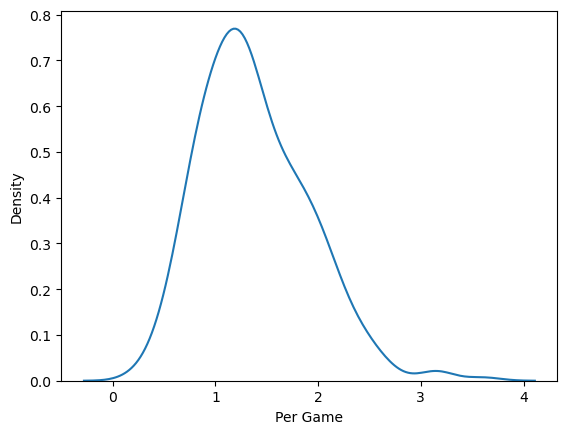

In [69]:
goals_for_df["Per Game"] = goals_for_df["Per Game"].astype(float)
sns.kdeplot(data=goals_for_df, x="Per Game")

In [70]:
base_url = "https://ncaa-api.henrygd.me"
pages = ["/stats/soccer-women/d1/current/team/58"] + [f"/stats/soccer-women/d1/current/team/58/p{i}" for i in range(2, 8)]

dfs = []
for page in pages:
    url = base_url + page
    response = requests.get(url)
    df = pd.DataFrame(response.json())
    df = pd.concat([df.drop(["sport", "title", "updated", "page", "pages", "data"], axis=1), df["data"].apply(pd.Series)], axis=1)
    dfs.append(df)

goals_against_df = pd.concat(dfs)
goals_against_df

,Rank,Team,Team Games,GA,Team Min,GAA
0,1,UCLA,22,7,1980,.318
1,2,Mississippi St.,19,8,1720,.419
2,3,SFA,19,9,1718,.471
3,4,Georgetown,19,9,1710,.474
4,5,Western Caro.,21,10,1890,.476
...,...,...,...,...,...,...
34,335,Pacific,20,61,1800,3.050
35,336,Mississippi Val.,15,47,1350,3.133
36,337,South Carolina St.,16,57,1350,3.800
37,338,Ark.-Pine Bluff,15,60,1350,4.000


<Axes: xlabel='GAA', ylabel='Density'>

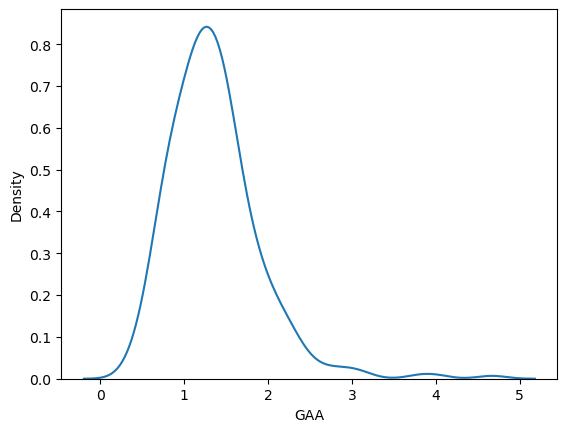

In [71]:
goals_against_df["GAA"] = goals_against_df["GAA"].astype(float)
sns.kdeplot(data=goals_against_df, x="GAA")

In [72]:
ovr_goals_df = pd.merge(goals_for_df, goals_against_df, on="Team")
ovr_goals_df["+/- GPG"] = ovr_goals_df["Per Game"] - ovr_goals_df["GAA"]
scaler = StandardScaler()
ovr_goals_df["+/- GPG Z-Score"] = scaler.fit_transform(ovr_goals_df[["+/- GPG"]])
ovr_goals_df = ovr_goals_df.sort_values(by="+/- GPG Z-Score", ascending=False)
ovr_goals_df

,Rank_x,Team,Team Games_x,Goals,Per Game,Rank_y,Team Games_y,GA,Team Min,GAA,+/- GPG,+/- GPG Z-Score
0,1,Arkansas,18,65,3.61,28,18,13,1638,0.714,2.896,3.025433
2,3,SFA,19,60,3.16,3,19,9,1718,0.471,2.689,2.807291
1,2,Duke,17,54,3.18,37,17,13,1530,0.765,2.415,2.518542
3,4,Florida St.,19,59,3.11,59,19,17,1730,0.884,2.226,2.319369
4,5,Utah St.,23,62,2.70,12,23,14,2070,0.609,2.091,2.177103
...,...,...,...,...,...,...,...,...,...,...,...,...
329,-,Prairie View,17,9,0.53,333,17,49,1528,2.886,-2.356,-2.509263
331,-,Temple,19,10,0.53,334,19,55,1710,2.895,-2.365,-2.518747
320,321,Ark.-Pine Bluff,15,10,0.67,338,15,60,1350,4.000,-3.330,-3.535690
337,338,South Carolina St.,16,5,0.31,337,16,57,1350,3.800,-3.490,-3.704302


In [73]:
base_url = "https://ncaa-api.henrygd.me"
pages = ["/stats/soccer-women/d1/current/team/915"] + [f"/stats/soccer-women/d1/current/team/915/p{i}" for i in range(2, 8)]

dfs = []
for page in pages:
    url = base_url + page
    response = requests.get(url)
    df = pd.DataFrame(response.json())
    df = pd.concat([df.drop(["sport", "title", "updated", "page", "pages", "data"], axis=1), df["data"].apply(pd.Series)], axis=1)
    dfs.append(df)

total_points_df = pd.concat(dfs)
total_points_df["Points"] = total_points_df["Points"].astype(int)
total_points_df["Team Games"] = total_points_df["Team Games"].astype(int)
total_points_df["PPG"] = round(total_points_df["Points"] / total_points_df["Team Games"], 2)
total_points_df

,Rank,Team,Team Games,Points,PPG
0,1,Arkansas,18,198,11.00
1,2,Utah St.,23,189,8.22
2,3,Florida St.,19,185,9.74
3,4,Duke,17,171,10.06
4,5,SFA,19,168,8.84
...,...,...,...,...,...
34,335,Nicholls,16,20,1.25
35,-,San Jose St.,19,20,1.05
36,337,Western Ill.,16,17,1.06
37,338,South Carolina St.,16,10,0.62


<Axes: xlabel='PPG', ylabel='Density'>

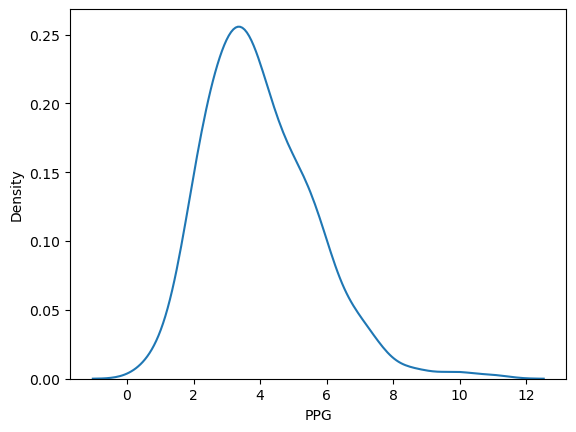

In [74]:
sns.kdeplot(data=total_points_df, x="PPG")

In [80]:
all_stats_df = pd.merge(ovr_goals_df, ovr_hitting_pct_df, how="outer", on="Team")
all_stats_df = pd.merge(all_stats_df, ovr_scoring_df, how="outer", on="Team")

In [81]:
def calculate_avg_zscore(row):
    scores = row[['+/- Pct Z-Score', '+/- GPG Z-Score', '+/- PPG Z-Score']]
    valid_scores = scores[~scores.isna()]  # Exclude NaN values
    if len(valid_scores) > 0:
        return valid_scores.mean()  # Calculate the mean of valid scores
    else:
        return np.nan  # Return NaN if all scores are NaN

all_stats_df['Avg_Z_Score'] = all_stats_df.apply(calculate_avg_zscore, axis=1)  # Apply the function to each row
all_stats_df = all_stats_df[["Team", "Per Game", "GAA", "+/- GPG", "+/- GPG Z-Score", "Pct.", "Opp Pct", "+/- Pct", "+/- Pct Z-Score", "PPG", "Avg", "+/- PPG", "+/- PPG Z-Score", "Avg_Z_Score"]]
all_stats_df.rename(columns={"Per Game": "Goals For Per Game", "GAA": "Goals Allowed Per Game", "Pct.": "Hitting %", "Opp Pct": "Opp Hitting %", "+/- Pct": "+/- Hitting %", "+/- Pct Z-Score": "+/- Hitting % Z-Score", "PPG": "Points Per Game", "Avg": "Points Allowed Per Game"}, inplace=True)
all_stats_df.sort_values(by="Avg_Z_Score", ascending=False, inplace=True)
all_stats_df.reset_index(inplace=True)
all_stats_df.drop(["index"], axis=1, inplace=True)
all_stats_df.head(10)

,Team,Goals For Per Game,Goals Allowed Per Game,+/- GPG,+/- GPG Z-Score,Hitting %,Opp Hitting %,+/- Hitting %,+/- Hitting % Z-Score,Points Per Game,Points Allowed Per Game,+/- PPG,+/- PPG Z-Score,Avg_Z_Score
0,Dayton,2.25,0.950,1.300,1.343526,0.302,0.131,0.171,2.835628,NaN,NaN,NaN,NaN,2.089577
1,UT Arlington,NaN,NaN,NaN,NaN,0.281,0.157,0.124,2.036067,NaN,NaN,NaN,NaN,2.036067
2,SFA,3.16,0.471,2.689,2.807291,0.241,0.173,0.068,1.083399,NaN,NaN,NaN,NaN,1.945345
3,Pittsburgh,2.22,1.222,0.998,1.025270,0.336,0.109,0.227,3.788296,36.7,25.11,11.59,0.756965,1.856844
4,Florida A&M,NaN,NaN,NaN,NaN,0.251,0.146,0.105,1.712841,NaN,NaN,NaN,NaN,1.712841
5,Creighton,1.24,1.235,0.005,-0.021179,0.318,0.127,0.191,3.175866,NaN,NaN,NaN,NaN,1.577344
6,Texas,2.14,0.754,1.386,1.434155,0.266,0.193,0.073,1.168459,38.9,12.11,26.79,2.100447,1.567687
7,South Dakota St.,1.95,0.710,1.240,1.280296,0.248,0.154,0.094,1.525709,NaN,NaN,NaN,NaN,1.403003
8,Lipscomb,2.29,0.614,1.676,1.739765,0.260,0.200,0.060,0.947304,NaN,NaN,NaN,NaN,1.343534
9,Arkansas,3.61,0.714,2.896,3.025433,0.233,0.192,0.041,0.624077,33.0,26.33,6.67,0.322101,1.323870


In [82]:
all_stats_df.describe()

,Goals For Per Game,Goals Allowed Per Game,+/- GPG,+/- GPG Z-Score,Hitting %,Opp Hitting %,+/- Hitting %,+/- Hitting % Z-Score,Points Per Game,Points Allowed Per Game,+/- PPG,+/- PPG Z-Score,Avg_Z_Score
count,339.000000,339.000000,339.000000,339.000000,333.000000,333.000000,333.000000,333.000000,133.000000,133.000000,133.000000,1.330000e+02,356.000000
mean,1.379204,1.354106,0.025097,0.000000,0.209523,0.205207,0.004315,0.000000,28.381955,25.356165,3.025789,1.068485e-16,-0.051236
std,0.535063,0.546798,0.950326,1.001478,0.039539,0.028220,0.058871,1.001505,6.679875,6.788436,11.356660,1.003781e+00,0.768279
min,0.220000,0.318000,-4.447000,-4.712814,0.113000,0.109000,-0.140000,-2.455082,13.300000,10.330000,-30.900000,-2.998598e+00,-3.704302
25%,1.000000,1.000000,-0.500000,-0.553361,0.182000,0.187000,-0.033000,-0.634805,23.600000,21.300000,-4.100000,-6.298269e-01,-0.541035
50%,1.290000,1.278000,0.005000,-0.021179,0.210000,0.204000,0.005000,0.011648,28.000000,24.110000,4.460000,1.267655e-01,-0.020612
75%,1.740000,1.578000,0.606000,0.612171,0.235000,0.224000,0.042000,0.641089,33.000000,29.800000,9.680000,5.881455e-01,0.461150
max,3.610000,4.667000,2.896000,3.025433,0.336000,0.283000,0.227000,3.788296,45.000000,46.000000,30.100000,2.393007e+00,2.089577


<Axes: title={'center': 'Distribution of Average z-Scores'}, xlabel='Average z-Score', ylabel='Density'>

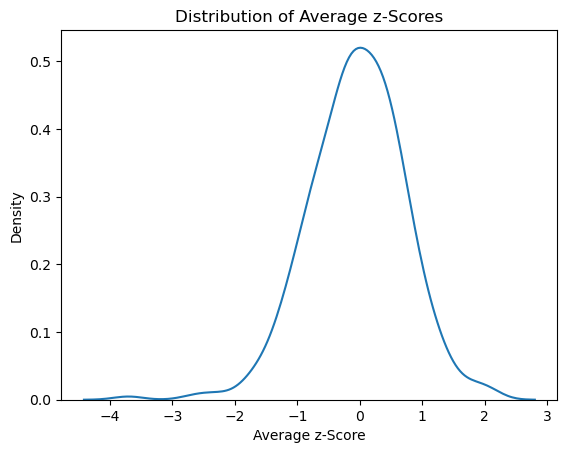

In [84]:
plt.xlabel("Average z-Score")
plt.title("Distribution of Average z-Scores")
sns.kdeplot(data=all_stats_df, x="Avg_Z_Score")

In [83]:
all_three_stats_df = all_stats_df[all_stats_df["+/- GPG Z-Score"].notna() & all_stats_df["+/- Hitting % Z-Score"].notna() & all_stats_df["+/- PPG Z-Score"].notna()]
all_three_stats_df.sort_values(by="Avg_Z_Score", ascending=False, inplace=True)
all_three_stats_df.head(5)

C:\Users\wee_w\AppData\Local\Temp\ipykernel_19296\136309488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_three_stats_df.sort_values(by="Avg_Z_Score", ascending=False, inplace=True)


,Team,Goals For Per Game,Goals Allowed Per Game,+/- GPG,+/- GPG Z-Score,Hitting %,Opp Hitting %,+/- Hitting %,+/- Hitting % Z-Score,Points Per Game,Points Allowed Per Game,+/- PPG,+/- PPG Z-Score,Avg_Z_Score
3,Pittsburgh,2.22,1.222,0.998,1.025270,0.336,0.109,0.227,3.788296,36.7,25.11,11.59,0.756965,1.856844
6,Texas,2.14,0.754,1.386,1.434155,0.266,0.193,0.073,1.168459,38.9,12.11,26.79,2.100447,1.567687
9,Arkansas,3.61,0.714,2.896,3.025433,0.233,0.192,0.041,0.624077,33.0,26.33,6.67,0.322101,1.323870
10,Penn St.,1.86,0.857,1.003,1.030540,0.286,0.185,0.101,1.644793,31.2,14.00,17.20,1.252816,1.309383
18,Notre Dame,2.50,0.889,1.611,1.671266,0.189,0.213,-0.024,-0.481698,38.3,11.11,27.19,2.135801,1.108456


In [85]:
p4_conferences = {
    "ACC": ["Boston College", "California", "Clemson", "Duke", "Florida St.", "Georgia Tech", "Louisville", "Miami (FL)", "North Carolina", "NC State", "Notre Dame", "Pittsburgh", "SMU", "Stanford", "Syracuse", "Virginia", "Virginia Tech", "Wake Forest"],
    "Big Ten": ["Illinois", "Indiana", "Iowa", "Maryland", "Michigan", "Michigan St.", "Minnesota", "Nebraska", "Northwestern", "Ohio St.", "Oregon", "Penn St.", "Purdue", "Rutgers", "Southern California", "UCLA", "Washington", "Wisconsin"],
    "Big 12": ["Arizona", "Arizona St.", "Baylor", "BYU", "Cincinnati", "Colorado", "Houston", "Iowa St.", "Kansas", "Kansas St.", "Oklahoma St.", "TCU", "Texas Tech", "UCF", "Utah", "West Virginia"],
    "SEC": ["Alabama", "Arkansas", "Auburn", "Florida", "Georgia", "Kentucky", "LSU", "Mississippi St.", "Missouri", "Oklahoma", "Ole Miss", "South Carolina", "Tennessee", "Texas", "Texas A&M", "Vanderbilt"]
}

In [86]:
acc_teams = all_stats_df[all_stats_df["Team"].isin(p4_conferences["ACC"])]
big_ten_teams = all_stats_df[all_stats_df["Team"].isin(p4_conferences["Big Ten"])]
big_12_teams = all_stats_df[all_stats_df["Team"].isin(p4_conferences["Big 12"])]
sec_teams = all_stats_df[all_stats_df["Team"].isin(p4_conferences["SEC"])]

In [ ]:
print(acc_teams["+/- GPG"].mean())
print(big_ten_teams["+/- GPG"].mean())
print(big_12_teams["+/- GPG"].mean())
print(sec_teams["+/- GPG"].mean())

In [ ]:
print(acc_teams["+/- Hitting %"].mean())
print(big_ten_teams["+/- Hitting %"].mean())
print(big_12_teams["+/- Hitting %"].mean())
print(sec_teams["+/- Hitting %"].mean())

0.035833333333333335

In [95]:
print(acc_teams["+/- PPG"].mean())
print(big_ten_teams["+/- PPG"].mean())
print(big_12_teams["+/- PPG"].mean())
print(sec_teams["+/- PPG"].mean())

6.117222222222222
5.582777777777778
4.525
10.230625


In [96]:
print(acc_teams["Avg_Z_Score"].mean())
print(big_ten_teams["Avg_Z_Score"].mean())
print(big_12_teams["Avg_Z_Score"].mean())
print(sec_teams["Avg_Z_Score"].mean())

0.5088246545321548
0.3608909590858663
0.31480112340073596
0.641432459756497


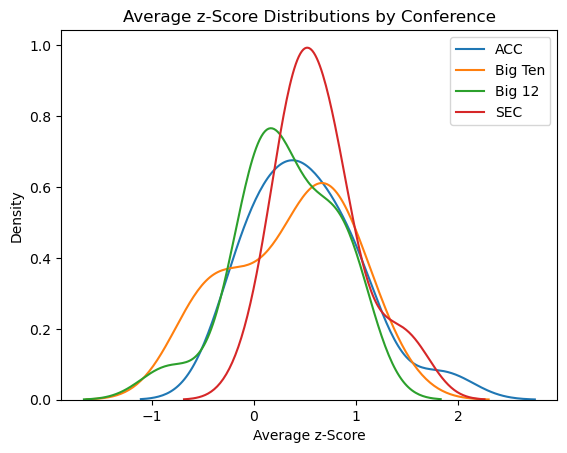

In [98]:
sns.kdeplot(data=acc_teams, x="Avg_Z_Score", label="ACC")
sns.kdeplot(data=big_ten_teams, x="Avg_Z_Score", label="Big Ten")
sns.kdeplot(data=big_12_teams, x="Avg_Z_Score", label="Big 12")
sns.kdeplot(data=sec_teams, x="Avg_Z_Score", label="SEC")
plt.title("Average z-Score Distributions by Conference")
plt.xlabel("Average z-Score")
plt.legend()
plt.show()

In [99]:
all_stats_df[all_stats_df["Team"] == "BYU"]

,Team,Goals For Per Game,Goals Allowed Per Game,+/- GPG,+/- GPG Z-Score,Hitting %,Opp Hitting %,+/- Hitting %,+/- Hitting % Z-Score,Points Per Game,Points Allowed Per Game,+/- PPG,+/- PPG Z-Score,Avg_Z_Score
39,BYU,1.75,1.35,0.4,0.395082,0.261,0.189,0.072,1.151447,33.7,19.78,13.92,0.962906,0.836479


In [102]:
all_stats_df["+/- GPG Rank"] = all_stats_df["+/- GPG"].rank(ascending=False)
all_stats_df[all_stats_df["Team"] == "BYU"]["+/- GPG Rank"].values[0]

113.5

In [103]:
all_stats_df["+/- Hitting % Rank"] = all_stats_df["+/- Hitting %"].rank(ascending=False)
all_stats_df[all_stats_df["Team"] == "BYU"]["+/- Hitting % Rank"].values[0]

39.5

In [104]:
all_stats_df["+/- PPG Rank"] = all_stats_df["+/- PPG"].rank(ascending=False)
all_stats_df[all_stats_df["Team"] == "BYU"]["+/- PPG Rank"].values[0]

18.0

In [105]:
all_stats_df["Avg_Z_Score Rank"] = all_stats_df["Avg_Z_Score"].rank(ascending=False)
all_stats_df[all_stats_df["Team"] == "BYU"]["Avg_Z_Score Rank"].values[0]

40.0

In [106]:
all_three_stats_df["+/- GPG Rank"] = all_three_stats_df["+/- GPG"].rank(ascending=False)
all_three_stats_df[all_three_stats_df["Team"] == "BYU"]["+/- GPG Rank"].values[0]

C:\Users\wee_w\AppData\Local\Temp\ipykernel_19296\3760736485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_three_stats_df["+/- GPG Rank"] = all_three_stats_df["+/- GPG"].rank(ascending=False)


58.5

In [107]:
all_three_stats_df["+/- Hitting % Rank"] = all_three_stats_df["+/- Hitting %"].rank(ascending=False)
all_three_stats_df[all_three_stats_df["Team"] == "BYU"]["+/- Hitting % Rank"].values[0]

C:\Users\wee_w\AppData\Local\Temp\ipykernel_19296\2905681768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_three_stats_df["+/- Hitting % Rank"] = all_three_stats_df["+/- Hitting %"].rank(ascending=False)


24.5

In [108]:
all_three_stats_df["+/- PPG Rank"] = all_three_stats_df["+/- PPG"].rank(ascending=False)
all_three_stats_df[all_three_stats_df["Team"] == "BYU"]["+/- PPG Rank"].values[0]

C:\Users\wee_w\AppData\Local\Temp\ipykernel_19296\1673975406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_three_stats_df["+/- PPG Rank"] = all_three_stats_df["+/- PPG"].rank(ascending=False)


17.0

In [109]:
all_three_stats_df["Avg_Z_Score Rank"] = all_three_stats_df["Avg_Z_Score"].rank(ascending=False)
all_three_stats_df[all_three_stats_df["Team"] == "BYU"]["Avg_Z_Score Rank"].values[0]

C:\Users\wee_w\AppData\Local\Temp\ipykernel_19296\1128813827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_three_stats_df["Avg_Z_Score Rank"] = all_three_stats_df["Avg_Z_Score"].rank(ascending=False)


19.0

In [110]:
big_12_teams["+/- GPG Rank"] = big_12_teams["+/- GPG"].rank(ascending=False)
big_12_teams[big_12_teams["Team"] == "BYU"]["+/- GPG Rank"].values[0]

C:\Users\wee_w\AppData\Local\Temp\ipykernel_19296\3587788255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_12_teams["+/- GPG Rank"] = big_12_teams["+/- GPG"].rank(ascending=False)


9.0

In [111]:
big_12_teams["+/- Hitting % Rank"] = big_12_teams["+/- Hitting %"].rank(ascending=False)
big_12_teams[big_12_teams["Team"] == "BYU"]["+/- Hitting % Rank"].values[0]

C:\Users\wee_w\AppData\Local\Temp\ipykernel_19296\3875368636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_12_teams["+/- Hitting % Rank"] = big_12_teams["+/- Hitting %"].rank(ascending=False)


4.0

In [112]:
big_12_teams["+/- PPG Rank"] = big_12_teams["+/- PPG"].rank(ascending=False)
big_12_teams[big_12_teams["Team"] == "BYU"]["+/- PPG Rank"].values[0]

C:\Users\wee_w\AppData\Local\Temp\ipykernel_19296\694482487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_12_teams["+/- PPG Rank"] = big_12_teams["+/- PPG"].rank(ascending=False)


1.0

In [113]:
big_12_teams["Avg_Z_Score Rank"] = big_12_teams["Avg_Z_Score"].rank(ascending=False)
big_12_teams[big_12_teams["Team"] == "BYU"]["Avg_Z_Score Rank"].values[0]

C:\Users\wee_w\AppData\Local\Temp\ipykernel_19296\2323900020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_12_teams["Avg_Z_Score Rank"] = big_12_teams["Avg_Z_Score"].rank(ascending=False)


4.0